# Delete Operation for Two Strings

Given two strings word1 and word2, return the minimum number of steps required to make word1 and word2 the same.

In one step, you can delete exactly one character in either string.

Example 1:

```
Input: word1 = "sea", word2 = "eat"
Output: 2
Explanation: You need one step to make "sea" to "ea" and another step to make "eat" to "ea".
```

Example 2:

```
Input: word1 = "leetcode", word2 = "etco"
Output: 4
```

Constraints:

```
1 <= word1.length, word2.length <= 500
word1 and word2 consist of only lowercase English letters.
```

## Solution : Longest Common Subsequence

In [1]:
class Solution:
    # Time = O(m*n)
    # Space = O(m*n)
    # m = len(word1)
    # n = len(word2)
    def minDistance(self, word1: str, word2: str) -> int:
        def LCS(s1, s2):
            m = len(s1)
            n = len(s2)

            dp = [[0]*(n+1) for _ in range(m+1)]

            for i in range(1, m+1):
                for j in range(1, n+1):
                    if s1[i-1] == s2[j-1]:
                        dp[i][j] = 1+dp[i-1][j-1]
                    else:
                        dp[i][j] = max(dp[i][j-1], dp[i-1][j])
            return dp[m][n]

        return len(word1)+len(word2)-2*LCS(word1, word2)


In [2]:
word1 = "sea"
word2 = "eat"
expected = 2

output = Solution().minDistance(word1, word2)
print(output)
assert output == expected

2


In [3]:
word1 = "leetcode"
word2 = "etco"
expected = 4

output = Solution().minDistance(word1, word2)
print(output)
assert output == expected

4


### Conceptual Note

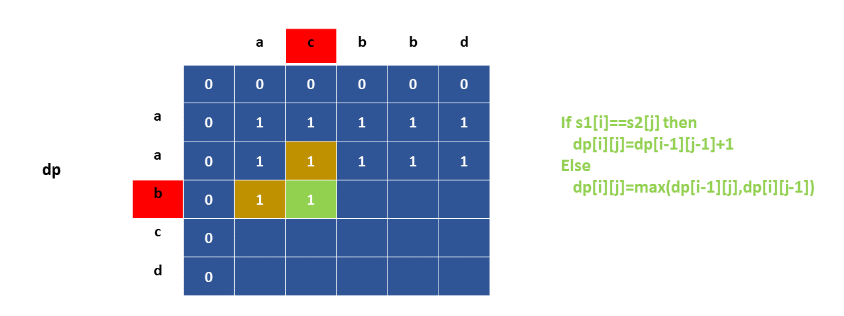

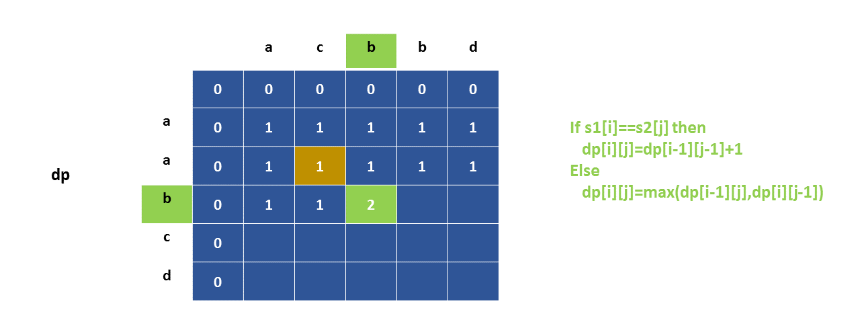

## Solution 2 : Longest Common Subsequence with optimized space

In [12]:
class Solution:
    # Time = O(m*n)
    # Space = O(min(m, n))
    # m = len(word1)
    # n = len(word2)
    def minDistance(self, word1: str, word2: str) -> int:
        def LCS(s1, s2):
            if len(s2) > len(s1):
                s1, s2 = s2, s1
            m = len(s1)
            n = len(s2)


            dp_previous = [0]*(n+1)
            dp_current = [0]*(n+1)

            for i in range(1, m+1):
                for j in range(1, n+1):
                    if s1[i-1] == s2[j-1]:
                        dp_current[j] = 1 + dp_previous[j-1]
                    else:
                        dp_current[j] = max(dp_current[j-1], dp_previous[j])

                dp_previous = dp_current[:]

            return dp_current[n]

        return len(word1)+len(word2)-2*LCS(word1, word2)


In [13]:
word1 = "sea"
word2 = "eat"
expected = 2

output = Solution().minDistance(word1, word2)
print(output)
assert output == expected

2


In [14]:
word1 = "leetcode"
word2 = "etco"
expected = 4

output = Solution().minDistance(word1, word2)
print(output)
assert output == expected


4
